<a href="https://colab.research.google.com/github/BiancaBb01/PMP-2024/blob/main/Tema9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercitiul 1

Output()

Output()

ERROR:pymc.stats.convergence:There were 284 divergences after tuning. Increase `target_accept` or reparameterize.


Frontiera de decizie: 3.33 ore de studiu


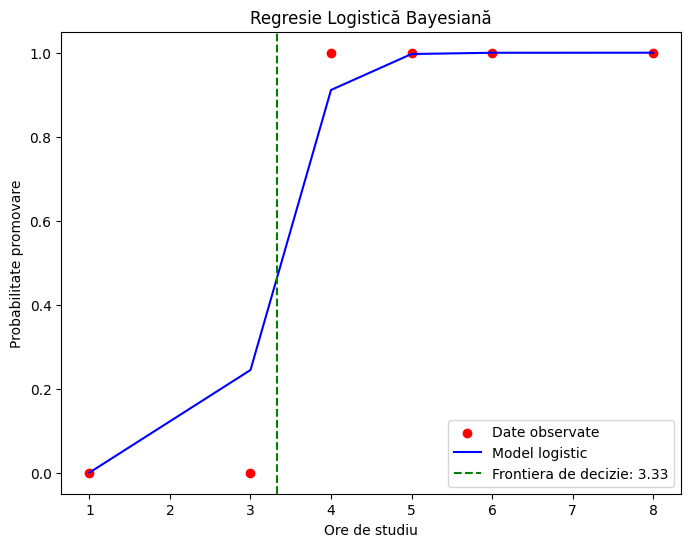

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Datele de intrare
hours_study = np.array([1, 3, 4, 5, 6, 8])  # ore de studiu
pass_exam = np.array([0, 0, 1, 1, 1, 1])    # promovare (0/1)

# Modelul Bayesian de regresie logistica
with pm.Model() as logistic_model:
    # Prior pentru coeficientul de panta (beta) și intercept (alpha)
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)

    # Likelihood (modelul logistic)
    p = pm.math.sigmoid(alpha + beta * hours_study)
    y_obs = pm.Bernoulli("y_obs", p=p, observed=pass_exam)

    # Sampling (folosim target_accept pentru a evita divergentele)
    trace = pm.sample(2000, tune=2000, target_accept=0.9, return_inferencedata=True)

# Extragem mediile și valorile pentru alpha și beta
alpha_mean = trace.posterior["alpha"].mean().values
beta_mean = trace.posterior["beta"].mean().values

# Frontiera de decizie (punctul unde probabilitatea de promovare este 50%)
decision_boundary = -alpha_mean / beta_mean
print(f"Frontiera de decizie: {decision_boundary:.2f} ore de studiu")


plt.figure(figsize=(8, 6))
plt.scatter(hours_study, pass_exam, color='red', label="Date observate")
plt.plot(
    hours_study,
    1 / (1 + np.exp(-(alpha_mean + beta_mean * hours_study))),
    label="Model logistic",
    color="blue"
)
plt.axvline(decision_boundary, color="green", linestyle="--", label=f"Frontiera de decizie: {decision_boundary:.2f}")
plt.xlabel("Ore de studiu")
plt.ylabel("Probabilitate promovare")
plt.legend()
plt.title("Regresie Logistică Bayesiană")
plt.show()


Exercitiul 2

Output()

Output()

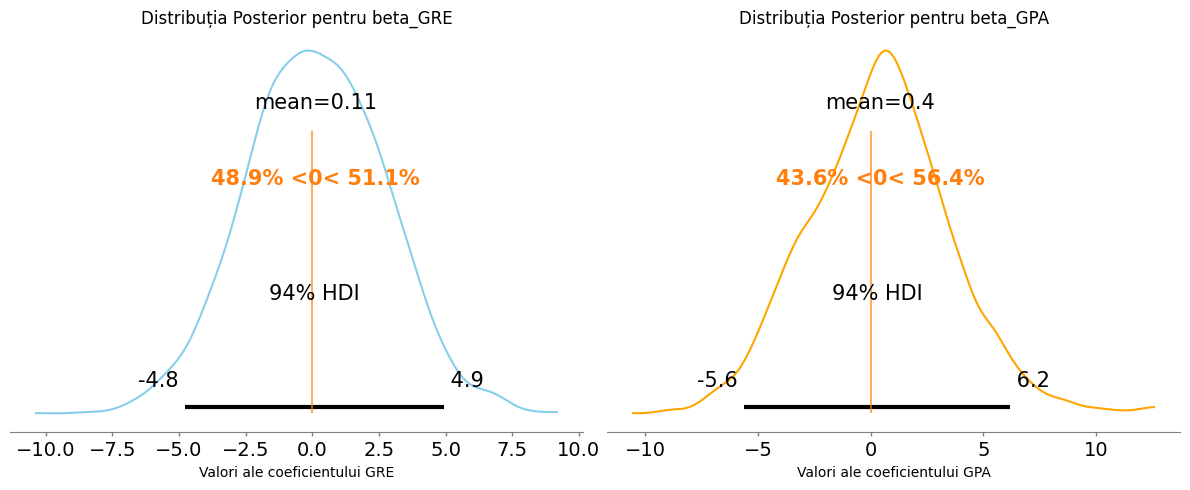

In [30]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

np.random.seed(42)
n = 400
GRE = np.random.normal(500, 50, n)  # GRE
GPA = np.random.normal(3.0, 0.5, n)  # GPA
admitted = (0.01 * GRE + 0.8 * GPA + np.random.normal(0, 0.5, n)) > 4.5

data = pd.DataFrame({"GRE": GRE, "GPA": GPA, "admitted": admitted.astype(int)})

#Normalizarea
data["GRE_norm"] = (data["GRE"] - data["GRE"].mean()) / data["GRE"].std()
data["GPA_norm"] = (data["GPA"] - data["GPA"].mean()) / data["GPA"].std()


with pm.Model() as logistic_model:

    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_GRE = pm.Normal("beta_GRE", mu=0, sigma=10)
    beta_GPA = pm.Normal("beta_GPA", mu=0, sigma=10)

    logit_p = beta_0 + beta_GRE * data["GRE_norm"] + beta_GPA * data["GPA_norm"]
    p = pm.math.sigmoid(logit_p)

    y_obs = pm.Bernoulli("y_obs", p=p, observed=data["admitted"])

    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

az.plot_posterior(trace.posterior["beta_GRE"].values.flatten(),
                  hdi_prob=0.94, ref_val=0, color="skyblue", ax=ax[0])
ax[0].set_title("Distribuția Posterior pentru beta_GRE")
ax[0].set_xlabel("Valori ale coeficientului GRE")


az.plot_posterior(trace.posterior["beta_GPA"].values.flatten(),
                  hdi_prob=0.94, ref_val=0, color="orange", ax=ax[1])
ax[1].set_title("Distribuția Posterior pentru beta_GPA")
ax[1].set_xlabel("Valori ale coeficientului GPA")

plt.tight_layout()
plt.show()
